### Edgar Moises Hernandez-Gonzalez
#### 11/11/19-19/11/19
#### Clasificar RAW con LSTM

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.metrics import cohen_kappa_score, confusion_matrix, classification_report

In [2]:
x_train = pd.read_csv("MI-EEG-A01T.csv", header=None)
x_test = pd.read_csv("MI-EEG-A01E.csv", header=None)
y_train = pd.read_csv("EtiquetasA01T.csv", header=None)
y_test = pd.read_csv("EtiquetasA01E.csv", header=None)

In [3]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(288, 22000)
(288, 22000)
(288, 1)
(288, 1)


In [4]:
n_samples_train = len(y_train)
n_samples_test = len(y_test) #en caso de no tener el y_test se puede utilizar el x_test

print("n_samples_train:", n_samples_train)
print("n_samples_test :", n_samples_test)

n_samples_train: 288
n_samples_test : 288


In [5]:
n_classes = len(np.unique(y_test)) #esto se podria calcular asi n_clases = len(np.unique(y)), la y puede ser train o test

print("n_classes:", n_classes)

n_classes: 4


In [6]:
#escalar los datos para que tengan media = 0 y desviacion estandar = 1
scaler = StandardScaler().fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [7]:
#codificar etiquetas con valores de 0 a nClases-1
le = LabelEncoder().fit(y_train)
y_train = le.transform(y_train)
y_test = le.transform(y_test)

C:\Users\EdgarMoises\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\EdgarMoises\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [8]:
#convertir de 2D a 3D
x_train = x_train.reshape((n_samples_train, 1000, 22))
x_test = x_test.reshape((n_samples_test, 1000, 22))

print(x_train.shape)
print(x_test.shape)

(288, 1000, 22)
(288, 1000, 22)


In [9]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, input_shape=(1000,22)))
model.add(LSTM(64, return_sequences=True))
model.add(LSTM(64))
model.add(Dropout(0.2))
model.add(Dense(n_classes, activation='softmax'))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [10]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 1000, 64)          22272     
_________________________________________________________________
lstm_1 (LSTM)                (None, 1000, 64)          33024     
_________________________________________________________________
lstm_2 (LSTM)                (None, 64)                33024     
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense (Dense)                (None, 64)                4160      
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 260       
Total para

In [11]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [12]:
history = model.fit(x_train, y_train, epochs=10, batch_size=18, validation_data=(x_test, y_test)) #cambiar a 20 epocas

Train on 288 samples, validate on 288 samples
Epoch 1/10
288/288 [==============================] - 163s 566ms/sample - loss: 1.3921 - acc: 0.1979 - val_loss: 1.3902 - val_acc: 0.2465
Epoch 2/10
288/288 [==============================] - 187s 648ms/sample - loss: 1.3780 - acc: 0.3090 - val_loss: 1.3864 - val_acc: 0.2257
Epoch 3/10
288/288 [==============================] - 157s 546ms/sample - loss: 1.3734 - acc: 0.2986 - val_loss: 1.3897 - val_acc: 0.2361
Epoch 4/10
288/288 [==============================] - 148s 514ms/sample - loss: 1.3532 - acc: 0.3368 - val_loss: 1.3719 - val_acc: 0.2708
Epoch 5/10
288/288 [==============================] - 137s 475ms/sample - loss: 1.3380 - acc: 0.3542 - val_loss: 1.3821 - val_acc: 0.2743
Epoch 6/10
288/288 [==============================] - 160s 555ms/sample - loss: 1.2911 - acc: 0.3819 - val_loss: 1.4048 - val_acc: 0.2882
Epoch 7/10
288/288 [==============================] - 163s 564ms/sample - loss: 1.2367 - acc: 0.4340 - val_loss: 1.3780 - val_

In [13]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

288/288 [==============================] - 27s 95ms/sample - loss: 1.4483 - acc: 0.3194
Test loss: 1.4482573138342962
Test accuracy: 0.31944445


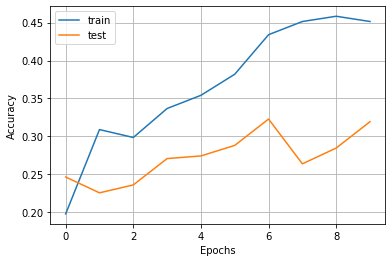

In [14]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.grid()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['train', 'test'])
plt.show()

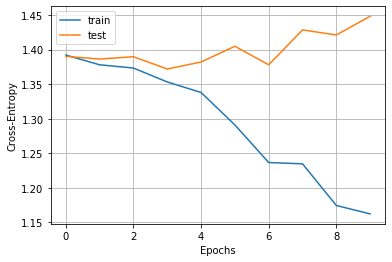

In [15]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.grid()
plt.xlabel('Epochs')
plt.ylabel('Cross-Entropy')
plt.legend(['train', 'test'])
plt.show()

In [16]:
probabilidades = model.predict(x_test)
y_pred = np.argmax(probabilidades, 1) #1=fila

In [17]:
kappa = cohen_kappa_score(y_test, y_pred)
print(kappa)

0.09259259259259256


In [18]:
matrizConfusion = confusion_matrix(y_test, y_pred)
print(matrizConfusion)

[[18 39 10  5]
 [ 8 40 17  7]
 [12 26 15 19]
 [13 16 24 19]]


In [19]:
reporteClassificacion = classification_report(y_test, y_pred)
print(reporteClassificacion)

              precision    recall  f1-score   support

           0       0.35      0.25      0.29        72
           1       0.33      0.56      0.41        72
           2       0.23      0.21      0.22        72
           3       0.38      0.26      0.31        72

   micro avg       0.32      0.32      0.32       288
   macro avg       0.32      0.32      0.31       288
weighted avg       0.32      0.32      0.31       288

